# Homework 3
## Author: Hana McVicker
## Github link: https://github.com/hanamcvicker/EE399

In [21]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from numpy.linalg import svd
from sklearn.tree import plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [10]:
# Load the MNIST data
mnist = fetch_openml('mnist_784')
X = mnist.data[:10000] / 255.0  # use the first 1000 samples and Scale the data to [0, 1]
Y = mnist.target[:10000] # use the first 1000 samples

Your job is to perform an analysis of the MNIST data set. You will start by performing the following
analysis:

1. Do an SVD analysis of the digit images. You will need to reshape each image into a column vector
and each column of your data matrix is a different image.


In [11]:
# Reshape the digit images into column vectors
X = X.T

# Apply SVD to the data
U, S, V = svd(X, full_matrices=False)

2. What does the singular value spectrum look like and how many modes are necessary for good
image reconstruction? (i.e. what is the rank r of the digit space?)

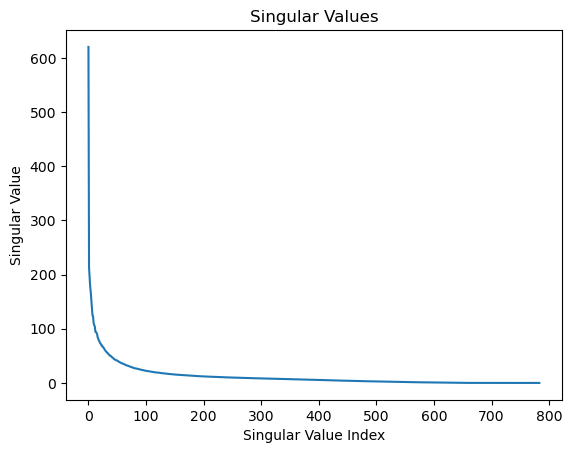

In [12]:
# Plot the singular values
plt.plot(S)
plt.title('Singular Values')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.show()

3. What is the interpretation of the U, Σ, and V matrices?

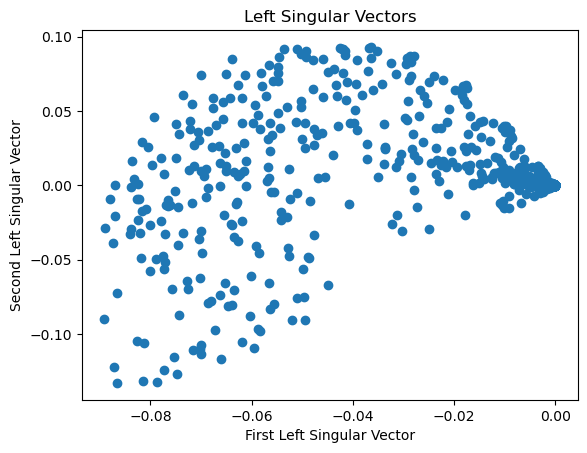

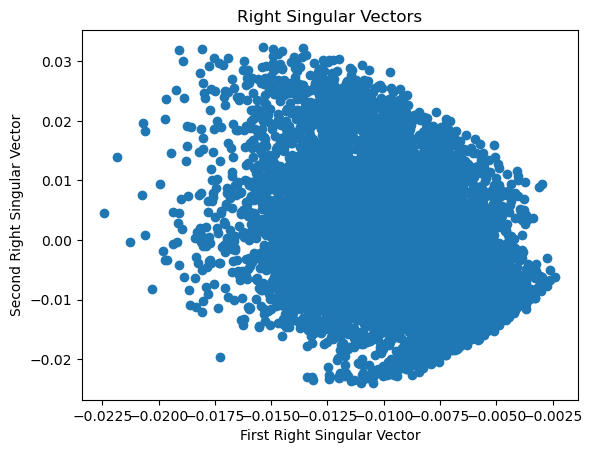

In [13]:
# Plot the left singular vectors
plt.scatter(U[:, 0], U[:, 1])
plt.xlabel('First Left Singular Vector')
plt.ylabel('Second Left Singular Vector')
plt.title('Left Singular Vectors')
plt.show()

# Plot the right singular vectors
plt.scatter(V[0, :], V[1, :])
plt.xlabel('First Right Singular Vector')
plt.ylabel('Second Right Singular Vector')
plt.title('Right Singular Vectors')
plt.show()


4. On a 3D plot, project onto three selected V-modes (columns) colored by their digit label. For
example, columns 2,3, and 5.

(10000, 3)


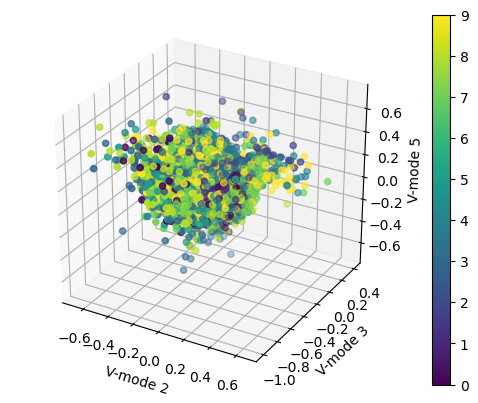

In [68]:
# Select the 2nd, 3rd, and 5th V-modes
V_select = V[:, [2, 3, 5]]  

# Project the data onto the selected V-modes using matrix multiplication
X_proj = np.dot(X, V_select)
print(X_proj.shape)

# Create a 3D scatter plot colored by digit label
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c=Y.astype(int))
plt.colorbar(scatter)
ax.set_xlabel('V-mode 2')
ax.set_ylabel('V-mode 3')
ax.set_zlabel('V-mode 5')
plt.show()

Once you have performed the above and have your data projected into PCA space, you will build a
classifier to identify individual digits in the training set.

• Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify
them.

In [18]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Create a new dataset with only the two digits
X_train_2 = X_train[(Y_train == '2') | (Y_train == '3')]
Y_train_2 = Y_train[(Y_train == '2') | (Y_train == '3')]

X_test_2 = X_test[(Y_test == '2') | (Y_test == '3')]
Y_test_2 = Y_test[(Y_test == '2') | (Y_test == '3')]

print(X_train_2.shape)
print(Y_train_2.shape)
print(X_test_2.shape)
print(Y_test_2.shape)

# Fit a linear discriminant analysis model to the data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_2, Y_train_2)

# Make predictions on the test data
Y_pred = lda.predict(X_test_2)
Y_pred2 = lda.predict(X_train_2)

# Compute the accuracy of the predictions
accuracy1 = accuracy_score(Y_test_2, Y_pred)
accuracy2 = accuracy_score(Y_train_2, Y_pred2)
print("Test Accuracy:",accuracy1)
print("Training Accuracy:",accuracy2)


(11318, 784)
(11318,)
(2813, 784)
(2813,)
Test Accuracy 0.966228226093139
Training Accuracy 0.9756140660894151


• Pick three digits. Try to build a linear classifier to identify these three now.

In [19]:
# Create a new dataset with only the two digits
X_train_3 = X_train[(Y_train == '1') | (Y_train == '4')| (Y_train == '8')]
Y_train_3= Y_train[(Y_train == '1') | (Y_train == '4')| (Y_train == '8')]

X_test_3 = X_test[(Y_test == '1') | (Y_test == '4') | (Y_test == '8')]
Y_test_3 = Y_test[(Y_test == '1') | (Y_test == '4') | (Y_test == '8')]

print(X_train_3.shape)
print(Y_train_3.shape)
print(X_test_3.shape)
print(Y_test_3.shape)

# Fit a linear discriminant analysis model to the data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_3, Y_train_3)

# Make predictions on the test data
Y_pred = lda.predict(X_test_3)
Y_pred2 = lda.predict(X_train_3)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test_3, Y_pred)
accuracy2 = accuracy_score(Y_train_3, Y_pred2)
print("Test Accuracy:",accuracy)
print("Training Accuracy:",accuracy2)


(17274, 784)
(17274,)
(4252, 784)
(4252,)
Test Accuracy: 0.9661335841956726
Training Accuracy: 0.972096792867894


• Which two digits in the data set appear to be the most difficult to separate? Quantify the accuracy
of the separation with LDA on the test data.

In [80]:
# Initialize an empty list to store the accuracies and i, j values
accuracies = []

for i in range(10):
    for j in range(10):
        if i != j:
            X_train_2 = X_train[(Y_train == str(i)) | (Y_train == str(j))]
            Y_train_2 = Y_train[(Y_train == str(i)) | (Y_train == str(j))]

            X_test_2 = X_test[(Y_test == str(i)) | (Y_test == str(j))]
            Y_test_2 = Y_test[(Y_test == str(i)) | (Y_test == str(j))]

            # Fit a linear discriminant analysis model to the data
            lda = LinearDiscriminantAnalysis()
            lda.fit(X_train_2, Y_train_2)

            # Make predictions on the test data
            Y_pred = lda.predict(X_test_2)

            # Compute the accuracy of the predictions
            accuracy = accuracy_score(Y_test_2, Y_pred)

            print("The accuracy for digits", i, "and", j, "is", accuracy)

            # Append the i, j values and accuracy to the list
            accuracies.append((i, j, accuracy))

# Find the tuple with the highest accuracy
max_accuracy = max(accuracies, key=lambda x: x[2])

# Find the tuple with the lowest accuracy
min_accuracy = min(accuracies, key=lambda x: x[2])

# Print the i, j values and accuracy with the lowest accuracy and hardest to seperate
print("The lowest accuracy is for digits", min_accuracy[0], "and", min_accuracy[1], "with an accuracy of", min_accuracy[2])

# Print the i, j values and accuracy with the highest accuracy and most easy to seperate
print("The highest accuracy is for digits", max_accuracy[0], "and", max_accuracy[1], "with an accuracy of", max_accuracy[2])


The accuracy for digits 0 and 1 is 0.9918450560652395
The accuracy for digits 0 and 2 is 0.9853103195005508
The accuracy for digits 0 and 3 is 0.9902737752161384
The accuracy for digits 0 and 4 is 0.9950720242608037
The accuracy for digits 0 and 5 is 0.985474006116208
The accuracy for digits 0 and 6 is 0.9850310332238043
The accuracy for digits 0 and 7 is 0.9940267041461701
The accuracy for digits 0 and 8 is 0.9851851851851852
The accuracy for digits 0 and 9 is 0.9920376402461093
The accuracy for digits 1 and 0 is 0.9918450560652395
The accuracy for digits 1 and 2 is 0.978523489932886
The accuracy for digits 1 and 3 is 0.9835146719419716
The accuracy for digits 1 and 4 is 0.9930915371329879
The accuracy for digits 1 and 5 is 0.9839888618169161
The accuracy for digits 1 and 6 is 0.9936582109479306
The accuracy for digits 1 and 7 is 0.9887205929745407
The accuracy for digits 1 and 8 is 0.9631383158606696
The accuracy for digits 1 and 9 is 0.9900662251655629
The accuracy for digits 2 and 

• Which two digits in the data set are most easy to separate? Quantify the accuracy of the separation
with LDA on the test data.

In [ ]:
# Answer is above: 6 & 7

• SVM (support vector machines) and decision tree classifiers were the state-of-the-art until about
2014. How well do these separate between all ten digits? (see code below to get started).

In [20]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Create a support vector machine classifier
svm = SVC()

# Fit the classifier to the training data
svm.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = svm.predict(X_test)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the SVM:", accuracy)


# Create a decision tree classifier
tree = DecisionTreeClassifier()

# Fit the classifier to the training data
tree.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = tree.predict(X_test)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the Decision Tree Classifier:", accuracy)

Accuracy of the SVM: 0.9764285714285714
Accuracy of the Decision Tree Classifier: 0.8715714285714286


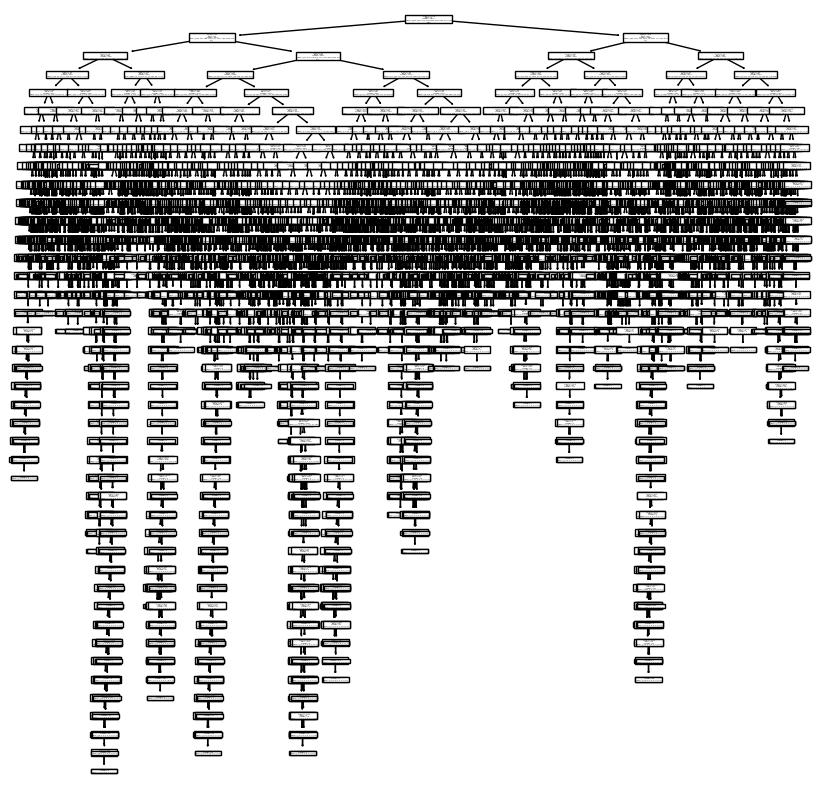

In [5]:
# Print the decision Tree classifier
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, ax=ax)
plt.show()

• Compare the performance between LDA, SVM and decision trees on the hardest and easiest pair
of digits to separate (from above).
Make sure to discuss the performance of your classifier on both the training and test sets.
NOTE: Make sure to make lots of pictures.

In [7]:
# Hardest Pair to seperate (lowest accuracy) : 5 & 8

# Create a new dataset with only the two digits
X_train_2 = X_train[(Y_train == '5') | (Y_train == '8')]
Y_train_2 = Y_train[(Y_train == '5') | (Y_train == '8')]
X_test_2 = X_test[(Y_test == '5') | (Y_test == '8')]
Y_test_2 = Y_test[(Y_test == '5') | (Y_test == '8')]
print(X_train_2.shape)
print(Y_train_2.shape)
print(X_test_2.shape)
print(Y_test_2.shape)

# Fit a linear discriminant analysis model to the data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_2, Y_train_2)

# Make predictions on the test data
Y_pred = lda.predict(X_test_2)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test_2, Y_pred)
print("The accuracy of the linear discriminant analysis model (LDA) on the hardest digits to seperate (5 and 8) is", accuracy)

# Fit a support vector machine classifier to the data
svm = SVC()
svm.fit(X_train_2, Y_train_2)

# Make predictions on the test data
Y_pred = svm.predict(X_test_2)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test_2, Y_pred)
print("The accuracy of the SVM model on the hardest digits to seperate (5 and 8) is", accuracy)

# Fit a decision tree classifier to the data
tree = DecisionTreeClassifier()
tree.fit(X_train_2, Y_train_2)

# Make predictions on the test data
Y_pred = tree.predict(X_test_2)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test_2, Y_pred)
print("The accuracy of the Decision Tree Classifier model on the hardest digits to seperate (5 and 8) is", accuracy)


# Easiest Pair to seperate (highest accuracy) : 6 & 7

# Create a new dataset with only the two digits
X_train_2 = X_train[(Y_train == '6') | (Y_train == '7')]
Y_train_2 = Y_train[(Y_train == '6') | (Y_train == '7')]
X_test_2 = X_test[(Y_test == '6') | (Y_test == '7')]
Y_test_2 = Y_test[(Y_test == '6') | (Y_test == '7')]
print(X_train_2.shape)
print(Y_train_2.shape)
print(X_test_2.shape)
print(Y_test_2.shape)

# Fit a linear discriminant analysis model to the data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_2, Y_train_2)

# Make predictions on the test data
Y_pred = lda.predict(X_test_2)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test_2, Y_pred)
print("The accuracy of the linear discriminant analysis model (LDA) on the easiest digits to seperate (6 and 7) is", accuracy)

# Fit a support vector machine classifier to the data
svm = SVC()
svm.fit(X_train_2, Y_train_2)

# Make predictions on the test data
Y_pred = svm.predict(X_test_2)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test_2, Y_pred)
print("The accuracy of the SVM model on the easiest digits to seperate (6 and 7) is", accuracy)

# Fit a decision tree classifier to the data
tree = DecisionTreeClassifier()
tree.fit(X_train_2, Y_train_2)

# Make predictions on the test data
Y_pred = tree.predict(X_test_2)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test_2, Y_pred)
print("The accuracy of the Decision Tree Classifier model on the easiest digits to seperate (6 and 7) is", accuracy)




(10508, 784)
(10508,)
(2630, 784)
(2630,)
The accuracy of the linear discriminant analysis model (LDA) is 0.9498098859315589
The accuracy of the SVM model is 0.988212927756654
The accuracy of the Decision Tree Classifier model is 0.9551330798479087
(11270, 784)
(11270,)
(2899, 784)
(2899,)
The accuracy of the linear discriminant analysis model (LDA) is 0.9968954812004139
The accuracy of the SVM model is 0.9993101069334254
The accuracy of the Decision Tree Classifier model is 0.9924111762676785
